In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


InceptionV3 Feature Shape: (8091, 51200)
ResNet50 Feature Shape: (8091, 100352)


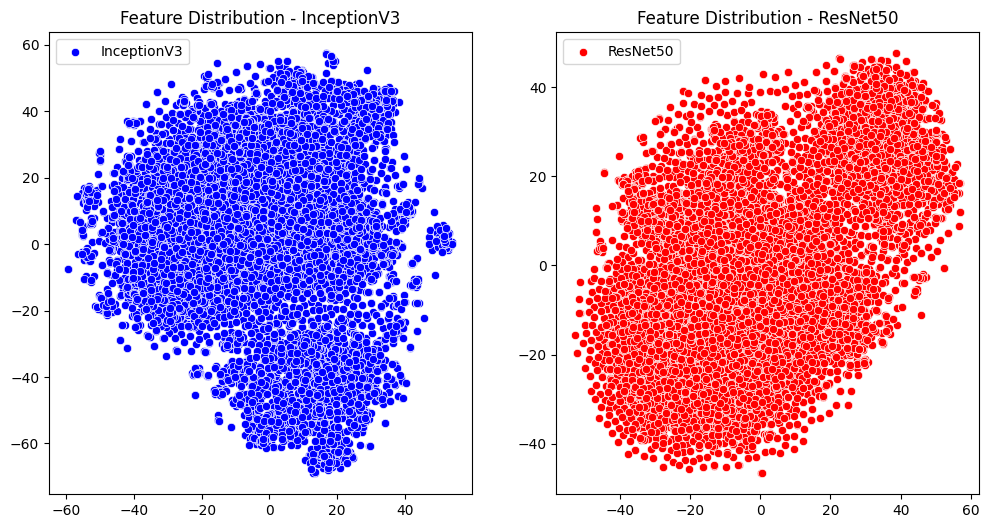

Explained variance using 50 PCA components: 0.63
Feature analysis completed. Visualization displayed.


In [5]:
# Load extracted features
with open("features_inception.pkl", "rb") as f:
    features_inception = pickle.load(f)

with open("features_resnet.pkl", "rb") as f:
    features_resnet = pickle.load(f)

# Convert features to numpy arrays
inception_vectors = np.array(list(features_inception.values()))
resnet_vectors = np.array(list(features_resnet.values()))

# Compare feature vector sizes
print(f"InceptionV3 Feature Shape: {inception_vectors.shape}")
print(f"ResNet50 Feature Shape: {resnet_vectors.shape}")

# Reduce dimensions using PCA
pca = PCA(n_components=1200)
inception_pca = pca.fit_transform(inception_vectors)
resnet_pca = pca.fit_transform(resnet_vectors)

# Further reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
inception_tsne = tsne.fit_transform(inception_pca)
resnet_tsne = tsne.fit_transform(resnet_pca)

# Plot feature distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=inception_tsne[:, 0], y=inception_tsne[:, 1], color='blue', label='InceptionV3')
plt.title("Feature Distribution - InceptionV3")

plt.subplot(1, 2, 2)
sns.scatterplot(x=resnet_tsne[:, 0], y=resnet_tsne[:, 1], color='red', label='ResNet50')
plt.title("Feature Distribution - ResNet50")

plt.show()

# Compute variance explained by PCA components
explained_variance = pca.explained_variance_ratio_.sum()
print(f"Explained variance using 50 PCA components: {explained_variance:.2f}")

print("Feature analysis completed. Visualization displayed.")
